In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib.request
import requests
import time 
from multiprocessing import Process, Queue, Pool
import threading
import sys
import numpy as np
import re
#from random_user_agent.user_agent import UserAgent
#from random_user_agent.params import SoftwareName, OperatingSystem
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
#from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
import pandasql as ps
from IPython.display import display,HTML
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime

In [2]:
def webscrapper_reebok(modelo):
    #Definimos la dirección donde tenemos el chromedriver
    path = "C:\webdriver\chromedriver.exe"
    #Definimos el driver
    driver = webdriver.Chrome(path)
    #Conseguimos la url de la página y la modificamos para buscar el modelo que queremos
    url = "https://www.reebok.mx/search/?q="+modelo+"&search-button=&lang=es"
    driver.get(url)
    time.sleep(12)
    
    #Buscamos la clase que contiene los productos y la agregamos al driver para que los obtenga 
    productos = driver.find_elements_by_class_name("plp__grid-products-wrapper")
    time.sleep(12)
    
    #Para crear la columna de las fechas de consulta
    fecha = time.strftime("%d/%m/%Y")
    lista_fecha = []
    for i in range(0,len(productos)):
        lista_fecha.append(fecha)
    time.sleep(12)
    
    #Para crear la columna de Autoservicio, hacemos que la llene completamente de "Reebok"
    lista_marcas = []
    for i in range(0,len(productos)):
        lista_marcas.append("Reebok")
    time.sleep(12)
    
    #Para crear la columna de los nombres buscamos la clase que lo contenga y llenamos cada casilla con ella
    lista_nombres = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("link.product-tile__title")[0].text #Para el nombre
            lista_nombres.append(productos[i].find_elements_by_class_name("link.product-tile__title")[0].text)
        except:
            lista_nombres.append(np.nan)  
    time.sleep(12)
    
    #Para crear la columna de los precios buscamos la clase que lo contenga y llenamos cada casilla con ella
    lista_precios = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("value")[0].text #Para el nombre
            lista_precios.append(productos[i].find_elements_by_class_name("value")[0].text)
        except:
            lista_precios.append(np.nan)
            
    time.sleep(12)
    
    """
    #Para crear la columna de las categorías buscamos la clase que lo contenga y llenamos cada casilla con ella
    lista_categorias = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("product-tile__category-wrapper")[0].text #Para el nombre
            lista_categorias.append(productos[i].find_elements_by_class_name("product-tile__category-wrapper")[0].text)
        except:
            lista_categorias.append(np.nan)
    time.sleep(12)
    """
    
    #Como la página no tiene una clase que contenga los colores, nos inventamos una para que la busque y llene de Nan la columna
    lista_colores = []
    for i in range(0,len(productos)):
        try:
            productos[0].find_elements_by_class_name("colores")[0].text #Para el nombre
            lista_colores.append(productos[0].find_elements_by_class_name("colores")[0].text)
        except:
            lista_colores.append(np.nan)
    time.sleep(12)
    
    #Agregamos el nombre del modelo que buscamos en todas las casillas
    lista_modelos = []
    for i in range(0,len(productos)):
        lista_modelos.append(modelo)
    time.sleep(12)
    
    time.sleep(12)
    
    #Creamos el DataFrame con las listas que acabamos de crear
    df_reebok = pd.DataFrame(columns = ["FECHA","AUTOSERVICIO","MODELO","NOMBRE","PRECIO","COLORES"])
    df_reebok["FECHA"] = lista_fecha
    df_reebok["AUTOSERVICIO"] = lista_marcas
    df_reebok["MODELO"] = lista_modelos
    df_reebok["NOMBRE"] = lista_nombres
    df_reebok["PRECIO"] = lista_precios
    df_reebok["COLORES"] = lista_colores
    
    #Ponemos la columna de nombres en mayúsculas
    df_reebok.NOMBRE = df_reebok.NOMBRE.str.upper() 
    
    #Quitamos lo que no necesitamos para solo conseguir el precio, además de convertir a float el precio.
    df_reebok.PRECIO = df_reebok.PRECIO.str.replace(",","")    
    df_reebok.PRECIO = df_reebok.PRECIO.str.replace("$","")    
    df_reebok.PRECIO = df_reebok.PRECIO.str.replace("pz","")
    df_reebok.PRECIO = df_reebok.PRECIO.astype(float)
    
    time.sleep(3)
    
    #Quitamos el driver
    driver.quit()
    
    #Retornamos el DataFrame
    return df_reebok

In [3]:
#Buscamos el modelo 'Royal' y creamos el primer DataFrame
Royal = webscrapper_reebok("Royal")
#Lo importamos a excel y lo nombramos así
Royal.to_excel("Royal.xlsx")
#Leemos el archivo que acabamos de crear
Royal = pd.read_excel("Royal.xlsx",index_col= 0)
#Royal

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\374393209.py:93: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_reebok.PRECIO = df_reebok.PRECIO.str.replace("$","")


In [4]:
#Buscamos el modelo 'Club' y creamos el segundo DataFrame
Club = webscrapper_reebok("Club")
#Lo importamos a excel y lo nombramos así
Club.to_excel("Club.xlsx")
#Leemos el archivo que acabamos de crear
Club = pd.read_excel("Club.xlsx",index_col=0)
#Club

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\374393209.py:93: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_reebok.PRECIO = df_reebok.PRECIO.str.replace("$","")


In [5]:
#Buscamos el modelo 'Classic' y creamos el tercer DataFrame
Classic = webscrapper_reebok("Classic")
#Lo importamos a excel y lo nombramos así
Classic.to_excel("Classic.xlsx")
#Leemos el archivo que acabamos de crear
Classic = pd.read_excel("Classic.xlsx",index_col=0)
#Classic

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\374393209.py:93: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_reebok.PRECIO = df_reebok.PRECIO.str.replace("$","")


In [6]:
#Buscamos el modelo 'Playera' y creamos el cuarto DataFrame
Playera = webscrapper_reebok("Playera")
#Lo importamos a excel y lo nombramos así
Playera.to_excel("Playera.xlsx")
#Leemos el archivo que acabamos de crear
Playera = pd.read_excel("Playera.xlsx",index_col=0)
#Playera

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\374393209.py:93: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_reebok.PRECIO = df_reebok.PRECIO.str.replace("$","")


In [7]:
#Concatenamos los 4 DataFrames en uno solo
scrapper_Reebok = pd.concat([Royal,Club,Classic,Playera])
#Arreglamos el índice de las columnas
scrapper_Reebok.index = range(scrapper_Reebok.shape[0])
#Mandamos a llamar al DataFrame
scrapper_Reebok

,FECHA,AUTOSERVICIO,MODELO,NOMBRE,PRECIO,COLORES
0,15/12/2022,Reebok,Royal,TENIS REEBOK ROYAL ULTRA,1599,NaN
1,15/12/2022,Reebok,Royal,TENIS ROYAL COMPLETE CLN 2,1099,NaN
2,15/12/2022,Reebok,Royal,TENIS ROYAL COMPLETE CLN 2,1099,NaN
3,15/12/2022,Reebok,Royal,TENIS REEBOK ROYAL PRIME 2,949,NaN
4,15/12/2022,Reebok,Royal,TENIS ROYAL BRIDGE 4 REEBOK,949,NaN
5,15/12/2022,Reebok,Royal,TENIS REEBOK ROYAL GLIDE RPLCLP,1699,NaN
6,15/12/2022,Reebok,Royal,TENIS ROYAL COMPLETE CLEAN 2.0,1149,NaN
7,15/12/2022,Reebok,Royal,TENIS ROYAL CLASSIC JOGGER 3.0,1349,NaN
8,15/12/2022,Reebok,Royal,TENIS ROYAL GLIDE RIPPLE CLIP REEBOK,1599,NaN
9,15/12/2022,Reebok,Royal,TENIS ROYAL COMPLETE CLN 2 REEBOK,1149,NaN


In [8]:
def webscrapper_converse(modelo):
    #Definimos la dirección donde tenemos el chromedriver
    path = "C:\webdriver\chromedriver.exe"
    #Definimos el driver
    driver = webdriver.Chrome(path)
    #Conseguimos la url de la página y la modificamos para buscar el modelo que queremos
    url = "https://converse.com.mx/hombres/calzado/"+modelo+"/"
    driver.get(url)
    time.sleep(12)
    
    #Buscamos la clase que contiene los productos y la agregamos al driver para que los obtenga 
    productos = driver.find_elements_by_class_name("item.product.product-item")
    time.sleep(12)
    
    #Para crear la columna de las fechas de consulta
    fecha = time.strftime("%d/%m/%Y")
    lista_fecha = []
    for i in range(0,len(productos)):
        lista_fecha.append(fecha)
    time.sleep(12)
    
    #Para crear la columna de Autoservicio, hacemos que la llene completamente de "Converse"
    lista_marcas = []
    for i in range(0,len(productos)):
        lista_marcas.append("Converse")    
    time.sleep(12)
    
    #Para crear la columna de los nombres buscamos la clase que lo contenga y llenamos cada casilla con ella
    lista_nombres = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("product-item-link")[0].text #Para el nombre
            lista_nombres.append(productos[i].find_elements_by_class_name("product-item-link")[0].text)
        except:
            lista_nombres.append(np.nan)
    time.sleep(12)
    
    #Para crear la columna de los precios buscamos la clase que lo contenga y llenamos cada casilla con ella
    lista_precios = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("price")[0].text #Para el nombre
            lista_precios.append(productos[i].find_elements_by_class_name("price")[0].text)
        except:
            lista_precios.append(np.nan)    
    time.sleep(12)
    
    """
    lista_categorias = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("product.category.product-item-category")[0].text #Para el nombre
            lista_categorias.append(productos[i].find_elements_by_class_name("product.category.product-item-category")[0].text)
        except:
            lista_categorias.append(np.nan)
    time.sleep(12)
    """
    #Buscamos la clase que contenga los colores y llenamos cada casilla de la columna con ella
    lista_colores = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("swatch-attribute.color")[0].text #Para el nombre
            lista_colores.append(productos[i].find_elements_by_class_name("swatch-attribute.color")[0].text)
        except:
            lista_colores.append(np.nan)
    time.sleep(12)
    
    #Agregamos el nombre del modelo que buscamos en todas las casillas
    lista_modelos = []
    for i in range(0,len(productos)):
        lista_modelos.append(modelo)
    time.sleep(12)
    
    #Creamos el DataFrame con las listas que acabamos de crear
    df_converse = pd.DataFrame(columns = ["FECHA","AUTOSERVICIO","MODELO","NOMBRE","PRECIO","COLORES"])
    df_converse["FECHA"] = lista_fecha
    df_converse["AUTOSERVICIO"] = lista_marcas
    df_converse["MODELO"] = lista_modelos
    df_converse["NOMBRE"] = lista_nombres
    df_converse["PRECIO"] = lista_precios
    df_converse["COLORES"] = lista_colores
    
    #Ponemos la columna de nombres en mayúsculas
    df_converse.NOMBRE = df_converse.NOMBRE.str.upper() 
    
    #Quitamos lo que no necesitamos para solo conseguir el precio, además de convertir a float el precio.
    df_converse.PRECIO = df_converse.PRECIO.str.replace(",","")    
    df_converse.PRECIO = df_converse.PRECIO.str.replace("$","")    
    df_converse.PRECIO = df_converse.PRECIO.astype(float)

    #df_converse = df_converse[df_converse.nombre.str.contains(modelo)]
    
    time.sleep(3)
    
    #Quitamos el driver
    driver.quit()
    
    #Retornamos el DataFrame
    return df_converse

In [9]:
#Buscamos el modelo 'Chuck-Taylor' y creamos el primer DataFrame
Chuck_Taylor = webscrapper_converse("Chuck-Taylor")
#Lo importamos a excel y lo nombramos así
Chuck_Taylor.to_excel("Chuck_Taylor.xlsx")
#Leemos el archivo que acabamos de crear
Chuck_Taylor = pd.read_excel("Chuck_Taylor.xlsx",index_col= 0)
#Chuck_Taylor

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3991138106.py:88: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_converse.PRECIO = df_converse.PRECIO.str.replace("$","")


In [10]:
#Buscamos el modelo 'Choclo' y creamos el segundo DataFrame
Choclo = webscrapper_converse("Choclo")
#Lo importamos a excel y lo nombramos así
Choclo.to_excel("Choclo.xlsx")
#Leemos el archivo que acabamos de crear
Choclo = pd.read_excel("Choclo.xlsx",index_col= 0)
#Choclo

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3991138106.py:88: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_converse.PRECIO = df_converse.PRECIO.str.replace("$","")


In [11]:
#Buscamos el modelo 'Chuck-70s' y creamos el tercer DataFrame
Chuck_70s = webscrapper_converse("Chuck-70s")
#Lo importamos a excel y lo nombramos así
Chuck_70s.to_excel("Chuck-70s.xlsx")
#Leemos el archivo que acabamos de crear
Chuck_70s = pd.read_excel("Chuck-70s.xlsx",index_col= 0)
#Chuck_70s

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3991138106.py:88: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_converse.PRECIO = df_converse.PRECIO.str.replace("$","")


In [12]:
#Buscamos el modelo 'Elevaciones' y creamos el cuarto DataFrame
Elevaciones = webscrapper_converse("Elevaciones")
#Lo importamos a excel y lo nombramos así
Elevaciones.to_excel("Elevaciones.xlsx")
#Leemos el archivo que acabamos de crear
Elevaciones = pd.read_excel("Elevaciones.xlsx",index_col= 0)
#Elevaciones

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3991138106.py:88: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_converse.PRECIO = df_converse.PRECIO.str.replace("$","")


In [13]:
#Buscamos el modelo 'Ultra' y creamos el cuarto DataFrame
Ultra = webscrapper_converse("Ultra")
#Lo importamos a excel y lo nombramos así
Ultra.to_excel("Ultra.xlsx")
#Leemos el archivo que acabamos de crear
Ultra = pd.read_excel("Ultra.xlsx",index_col= 0)
#Ultra

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3991138106.py:88: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_converse.PRECIO = df_converse.PRECIO.str.replace("$","")


In [14]:
#Concatenamos los 5 DataFrames en uno solo
scrapper_Converse = pd.concat([Chuck_Taylor,Choclo,Chuck_70s,Elevaciones,Ultra])
#Arreglamos el índice de las columnas
scrapper_Converse.index = range(scrapper_Converse.shape[0])
#Mandamos a llamar al DataFrame
scrapper_Converse

,FECHA,AUTOSERVICIO,MODELO,NOMBRE,PRECIO,COLORES
0,15/12/2022,Converse,Chuck-Taylor,FUTURE METALS CHUCK TAYLOR ALT STAR EN BOTA DE...,1999.0,1 color
1,15/12/2022,Converse,Chuck-Taylor,FUTURE METALS CHUCK TAYLOR ALT STAR EN BOTA DE...,1999.0,1 color
2,15/12/2022,Converse,Chuck-Taylor,COUNTER CLIMATE CHUCK TAYLOR ALL STAR EN BOTA ...,2399.0,3 colores
3,15/12/2022,Converse,Chuck-Taylor,COUNTER CLIMATE CHUCK TAYLOR ALL STAR EN BOTA ...,2399.0,3 colores
4,15/12/2022,Converse,Chuck-Taylor,COUNTER CLIMATE CHUCK TAYLOR ALL STAR EN BOTA ...,2399.0,3 colores
...,...,...,...,...,...,...
104,15/12/2022,Converse,Ultra,CHUCK TAYLOR ULTRA EN MEDIA BOTA DE MATERIAL T...,2099.0,3 colores
105,15/12/2022,Converse,Ultra,CHUCK TAYLOR ALL STAR ULTRA EN MEDIA BOTA DE T...,1949.0,1 color
106,15/12/2022,Converse,Ultra,CHUCK TAYLOR ALL STAR ULTRA EN MEDIA BOTA DE T...,1949.0,1 color
107,15/12/2022,Converse,Ultra,CHUCK TAYLOR ALL STAR FLUX ULTRA EN MEDIA BOTA...,1899.0,1 color


In [19]:
def webscrapper_Puma(modelo):
    #Definimos la dirección donde tenemos el chromedriver
    path = "C:\webdriver\chromedriver.exe"
    #Definimos el driver
    driver = webdriver.Chrome(path)
    #Conseguimos la url de la página y la modificamos para buscar el modelo que queremos
    url = "https://mx.puma.com/segmentifysearch?q="+modelo
    driver.get(url)
    time.sleep(12)
    
    #Buscamos la clase que contiene los productos y la agregamos al driver para que los obtenga 
    productos = driver.find_elements_by_class_name("ProductCard")
    time.sleep(12)
    
    #Para crear la columna de las fechas de consulta
    fecha = time.strftime("%d/%m/%Y")
    lista_fecha = []
    for i in range(0,len(productos)):
        lista_fecha.append(fecha)
    time.sleep(12)
    
    #Para crear la columna de Autoservicio, hacemos que la llene completamente de "Puma"
    lista_marcas = []
    for i in range(0,len(productos)):
        lista_marcas.append("Puma")
    time.sleep(12)
    
    #Para crear la columna de los nombres buscamos la clase que lo contenga y llenamos cada casilla con ella
    lista_nombres = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("ProductCard-Name.ProductCard-Name_isLoaded")[0].text #Para el nombre
            lista_nombres.append(productos[i].find_elements_by_class_name("ProductCard-Name.ProductCard-Name_isLoaded")[0].text)
        except:
            lista_nombres.append(np.nan)
    time.sleep(12)
    
    #Para crear la columna de los precios buscamos la clase que lo contenga y llenamos cada casilla con ella
    lista_precios = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("ProductPrice.ProductCard-Price")[0].text #Para el nombre
            lista_precios.append(productos[i].find_elements_by_class_name("ProductPrice.ProductCard-Price")[0].text)
        except:
            lista_precios.append(np.nan)
    time.sleep(12)
    
    #Para crear la columna de los colores buscamos la clase que lo contenga y llenamos cada casilla con ella
    lista_colores = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("ProductCard-ColorAttribut")[0].text #Para el nombre
            lista_colores.append(productos[i].find_elements_by_class_name("ProductCard-ColorAttribut")[0].text)
        except:
            lista_colores.append(np.nan)
    time.sleep(12)
    
    #Agregamos el nombre del modelo que buscamos en todas las casillas
    lista_modelos = []
    for i in range(0,len(productos)):
        lista_modelos.append(modelo)
    time.sleep(12)
    
    """
    #Como la página no tiene una categoría/descripción de los productos pondremos una clase inexistente para que llene el df con NaN
    lista_categorias = []
    for i in range(0,len(productos)):
        try:
            productos[i].find_elements_by_class_name("Categoria")[0].text
            lista_categorias.append(productos[i].find_elements_by_class_name("Categoria")[0].text) 
        except:
            lista_categorias.append(np.nan)
    time.sleep(12)
    """
    
    #Creamos el DataFrame con las listas que acabamos de crear
    df_Puma = pd.DataFrame(columns = ["FECHA","AUTOSERVICIO","MODELO","NOMBRE","PRECIO","COLORES"])
    df_Puma["FECHA"] = lista_fecha
    df_Puma["AUTOSERVICIO"] = lista_marcas
    df_Puma["MODELO"] = lista_modelos
    df_Puma["NOMBRE"] = lista_nombres
    df_Puma["PRECIO"] = lista_precios
    df_Puma["COLORES"] = lista_colores
    
    #Ponemos la columna de nombres en mayúsculas
    df_Puma.NOMBRE = df_Puma.NOMBRE.str.upper() 
    
    #Quitamos lo que no necesitamos para solo conseguir el precio, además de convertir a float el precio.
    df_Puma.PRECIO = df_Puma.PRECIO.str.replace(",","")    
    df_Puma.PRECIO = df_Puma.PRECIO.str.replace("$","")
    df_Puma.PRECIO = df_Puma.PRECIO.str.replace("Mex","")
    df_Puma.PRECIO = df_Puma.PRECIO.astype(float)
    time.sleep(3)
    
    #Quitamos el driver
    driver.quit()
    
    #Retornamos el DataFrame
    return df_Puma


In [20]:
#Buscamos el modelo 'Pokémon' y creamos el primer DataFrame
Pokemon = webscrapper_Puma("Pokémon")
#Lo importamos a excel y lo nombramos así
Pokemon.to_excel("Pokemon.xlsx")
#Leemos el archivo que acabamos de crear
Pokemon = pd.read_excel("Pokemon.xlsx",index_col= 0)
#Pokemon

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3282180511.py:90: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_Puma.PRECIO = df_Puma.PRECIO.str.replace("$","")


In [21]:
#Buscamos el modelo 'Slipstream' y creamos el segundo DataFrame
Slipstream = webscrapper_Puma("Slipstream")
#Lo importamos a excel y lo nombramos así
Slipstream.to_excel("Slipstream.xlsx")
#Leemos el archivo que acabamos de crear
Slipstream = pd.read_excel("Slipstream.xlsx",index_col= 0)
#Slipstream

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3282180511.py:90: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_Puma.PRECIO = df_Puma.PRECIO.str.replace("$","")


In [22]:
#Buscamos el modelo 'Minecraft' y creamos el tercer DataFrame
Minecraft = webscrapper_Puma("Minecraft")
#Lo importamos a excel y lo nombramos así
Minecraft.to_excel("Minecraft.xlsx")
#Leemos el archivo que acabamos de crear
Minecraft = pd.read_excel("Minecraft.xlsx",index_col= 0)
#Minecraft

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3282180511.py:90: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_Puma.PRECIO = df_Puma.PRECIO.str.replace("$","")


In [23]:
#Buscamos el modelo 'Mayze' y creamos el cuarto DataFrame
Mayze = webscrapper_Puma("Mayze")
#Lo importamos a excel y lo nombramos así
Mayze.to_excel("Mayze.xlsx")
#Leemos el archivo que acabamos de crear
Mayze = pd.read_excel("Mayze.xlsx",index_col= 0)
#Mayze

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3282180511.py:90: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_Puma.PRECIO = df_Puma.PRECIO.str.replace("$","")


In [24]:
#Buscamos el modelo 'Vogue' y creamos el quinto DataFrame
Vogue = webscrapper_Puma("Vogue")
#Lo importamos a excel y lo nombramos así
Vogue.to_excel("Vogue.xlsx")
#Leemos el archivo que acabamos de crear
Vogue = pd.read_excel("Vogue.xlsx",index_col= 0)
#Vogue

C:\Users\Jorge Cortés\AppData\Local\Temp\ipykernel_58296\3282180511.py:90: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_Puma.PRECIO = df_Puma.PRECIO.str.replace("$","")


In [25]:
#Concatenamos los 5 DataFrames en uno solo
scrapper_Puma = pd.concat([Pokemon,Slipstream,Minecraft,Mayze,Vogue])
#Arreglamos el índice de las columnas
scrapper_Puma.index = range(scrapper_Puma.shape[0])
#Mandamos a llamar al DataFrame
scrapper_Puma

,FECHA,AUTOSERVICIO,MODELO,NOMBRE,PRECIO,COLORES
0,15/12/2022,Puma,Pokémon,TENIS PARA BEBÉS RS-X PIKACHU PUMA X POKÉMON,1549,NaN
1,15/12/2022,Puma,Pokémon,TENIS INFANTILES RS-X PIKACHU PUMA X POKÉMON,1699,NaN
2,15/12/2022,Puma,Pokémon,TENIS PARA BEBÉS PUMA X POKÉMON SUEDE SQUIRTLE,1399,NaN
3,15/12/2022,Puma,Pokémon,TENIS SUEDE SQUIRTLE PUMA X POKÉMON,2499,NaN
4,15/12/2022,Puma,Pokémon,PLAYERA JUVENIL PUMA X POKÉMON,449,NaN
...,...,...,...,...,...,...
116,15/12/2022,Puma,Vogue,SUDADERA MUJER PUMA X VOGUE,1599,NaN
117,15/12/2022,Puma,Vogue,SUDADERA MUJER PUMA X VOGUE,1599,NaN
118,15/12/2022,Puma,Vogue,PANTS MUJER PUMA X VOGUE,1499,NaN
119,15/12/2022,Puma,Vogue,PANTS MUJER PUMA X VOGUE,1499,NaN


In [26]:
#Ahora concatenamos los DataFrames de cada marca en uno solo
scrapper = pd.concat([scrapper_Reebok,scrapper_Converse,scrapper_Puma])
#Arreglamos el índice de las columnas
scrapper.index = range(scrapper.shape[0])
#Mandamos a llamar al DataFrame final
scrapper

,FECHA,AUTOSERVICIO,MODELO,NOMBRE,PRECIO,COLORES
0,15/12/2022,Reebok,Royal,TENIS REEBOK ROYAL ULTRA,1599.0,NaN
1,15/12/2022,Reebok,Royal,TENIS ROYAL COMPLETE CLN 2,1099.0,NaN
2,15/12/2022,Reebok,Royal,TENIS ROYAL COMPLETE CLN 2,1099.0,NaN
3,15/12/2022,Reebok,Royal,TENIS REEBOK ROYAL PRIME 2,949.0,NaN
4,15/12/2022,Reebok,Royal,TENIS ROYAL BRIDGE 4 REEBOK,949.0,NaN
...,...,...,...,...,...,...
273,15/12/2022,Puma,Vogue,SUDADERA MUJER PUMA X VOGUE,1599.0,NaN
274,15/12/2022,Puma,Vogue,SUDADERA MUJER PUMA X VOGUE,1599.0,NaN
275,15/12/2022,Puma,Vogue,PANTS MUJER PUMA X VOGUE,1499.0,NaN
276,15/12/2022,Puma,Vogue,PANTS MUJER PUMA X VOGUE,1499.0,NaN


In [27]:
#Aquí comenzamos a hacer las consultas con SQL

In [28]:
#Ordenando todos los productos de mayor a menor precio
ps.sqldf("select * from scrapper order by PRECIO desc")

,FECHA,AUTOSERVICIO,MODELO,NOMBRE,PRECIO,COLORES
0,15/12/2022,Converse,Choclo,ALL STAR BB SHIFT EN CHOCLO DE MATERIAL SINTÉTICO,3799.0,1 color
1,15/12/2022,Converse,Choclo,ALL STAR BB SHIFT EN CHOCLO DE MATERIAL SINTÉTICO,3799.0,1 color
2,15/12/2022,Converse,Choclo,VIVA LAS VEGAS ALL STAR BB SHIFT EN CHOCLO DE ...,3599.0,1 color
3,15/12/2022,Converse,Choclo,SEASONAL ALL STAR BB SHIFT EN CHOCLO DE MATERI...,3599.0,1 color
4,15/12/2022,Converse,Choclo,UTILITY EXPLORE COUNTER CLIMATE UTILITY EN CHO...,3449.0,2 colores
...,...,...,...,...,...,...
273,15/12/2022,Reebok,Playera,PLAYERA GRÁFICA TRAINING ESSENTIALS,399.0,None
274,15/12/2022,Converse,Chuck-70s,SEE BEYOND CHUCK 70 EN BOTA DE LONA,NaN,None
275,15/12/2022,Converse,Elevaciones,SEASONAL COLOR CTAS LUGGED 2.0 EN BOTA DE LONA,NaN,None
276,15/12/2022,Converse,Elevaciones,RUN STAR MOTION EN PLATAFORMA DE LONA,NaN,None


In [29]:
#Sacando los productos más caros de cada modelo
ps.sqldf("select AUTOSERVICIO,MODELO,NOMBRE,MAX(PRECIO) from scrapper group by MODELO order by PRECIO desc;")

,AUTOSERVICIO,MODELO,NOMBRE,MAX(PRECIO)
0,Converse,Choclo,ALL STAR BB SHIFT EN CHOCLO DE MATERIAL SINTÉTICO,3799.0
1,Converse,Chuck-70s,COUNTER CLIMATE CHUCK 70 AT-CX CC EN BOTA DE LONA,3399.0
2,Converse,Elevaciones,SPONGE CRATER SLIP ON DE MATERIAL SINTÉTICO,3299.0
3,Puma,Slipstream,TENIS SLIPSTREAM LO CHARMANDER PUMA X POKÉMON,2899.0
4,Puma,Pokémon,TENIS RS-X PIKACHU PUMA X POKÉMON,2899.0
5,Puma,Mayze,TENIS PARA MUJER MAYZE STACK BEAUTIFUL FLAW,2699.0
6,Converse,Chuck-Taylor,COME TEES CHUCK 70 EN BOTA DE LONA,2699.0
7,Puma,Vogue,CHAMARRA MUJER PUMA X VOGUE,2399.0
8,Puma,Minecraft,TENIS JUVENILES PUMA X MINECRAFT TRC BLAZE,2199.0
9,Reebok,Club,TENIS CLUB C GEO MID,2199.0


In [30]:
#Haciendo la consulta contraria a la anterior, seleccionando los productos más baratos de cada modelo
ps.sqldf("select MODELO,NOMBRE,MIN(PRECIO) from scrapper group by MODELO order by PRECIO asc ")

,MODELO,NOMBRE,MIN(PRECIO)
0,Playera,PLAYERA GRÁFICA TRAINING ESSENTIALS,399.0
1,Minecraft,PLAYERA JUVENIL PUMA X MINECRAFT GRAPHIC,449.0
2,Pokémon,PLAYERA JUVENIL PUMA X POKÉMON,449.0
3,Mayze,PLAYERA PARA MUJER CLASSICS,549.0
4,Slipstream,PLAYERA PARA HOMBRE CLASSICS,699.0
5,Vogue,PLAYERA MUJER PUMA X VOGUE,799.0
6,Royal,TENIS REEBOK ROYAL PRIME 2,949.0
7,Classic,TENIS CLASSIC LEATHER,1049.0
8,Chuck-Taylor,CHUCK TAYLOR ALL STAR EN CHOCLO DE LONA,1249.0
9,Club,TENIS CLUB C,1299.0


In [45]:
#Para ver en promedio cuánto gastaríamos si quisiéramos comprar un producto de los distintos modelos
ps.sqldf("select MODELO,AVG(PRECIO) from scrapper group by MODELO order by AVG(PRECIO) desc")

,MODELO,AVG(PRECIO)
0,Choclo,2805.250000
1,Elevaciones,2719.588235
2,Chuck-70s,2464.217391
3,Slipstream,2110.111111
4,Chuck-Taylor,2030.250000
5,Ultra,1975.470588
6,Club,1732.333333
7,Classic,1619.833333
8,Mayze,1483.722222
9,Vogue,1452.846154


In [32]:
#Para ver los productos que se ajustan a nuestro presupuesto de $1000-$1500
ps.sqldf("select * from scrapper where PRECIO > 1000 and PRECIO < 1500 order by PRECIO desc")

,FECHA,AUTOSERVICIO,MODELO,NOMBRE,PRECIO,COLORES
0,15/12/2022,Puma,Mayze,CHAMARRA DEPORTIVA PARA MUJER DARE TO,1499.0,None
1,15/12/2022,Puma,Vogue,PANTS MUJER PUMA X VOGUE,1499.0,None
2,15/12/2022,Puma,Vogue,PANTS MUJER PUMA X VOGUE,1499.0,None
3,15/12/2022,Puma,Vogue,PANTS MUJER PUMA X VOGUE,1499.0,None
4,15/12/2022,Reebok,Royal,TENIS WONDER WOMAN ROYAL TECHQUE T,1449.0,None
5,15/12/2022,Puma,Mayze,TENIS DE CUERO INFANTILES MAYZE,1449.0,None
6,15/12/2022,Reebok,Club,CLUB C CARDI V2,1399.0,None
7,15/12/2022,Reebok,Classic,TENIS CLASSIC LEATHER POWER RANGERS,1399.0,None
8,15/12/2022,Puma,Pokémon,TENIS PARA BEBÉS PUMA X POKÉMON SUEDE SQUIRTLE,1399.0,None
9,15/12/2022,Reebok,Royal,TENIS ROYAL CLASSIC JOGGER 3.0,1349.0,None


In [33]:
#Queremos comprarnos unos Royal o unos Ultra, pero nuestro presupuesto es de $1500-$2000, así que consultamos los modelos que nos convienen
ps.sqldf("select * from scrapper where PRECIO > 1500 and PRECIO < 2000 and (MODELO = 'Royal' or MODELO = 'Ultra') order by PRECIO desc")

,FECHA,AUTOSERVICIO,MODELO,NOMBRE,PRECIO,COLORES
0,15/12/2022,Converse,Ultra,EDGE GLOW CHUCK TAYLOR ALL STAR ULTRA EN MEDIA...,1999.0,1 color
1,15/12/2022,Converse,Ultra,FUTURE METALS CHUCK TAYLOR ALL STAR ULTRA EN M...,1999.0,1 color
2,15/12/2022,Converse,Ultra,FUTURE COMFORT CHUCK TAYLOR ALL STAR ULTRA EN ...,1999.0,1 color
3,15/12/2022,Converse,Ultra,CHUCK TAYLOR ALL STAR ULTRA EN MEDIA BOTA DE M...,1999.0,1 color
4,15/12/2022,Converse,Ultra,FUTURE METALS CHUCK TAYLOR ALL STAR ULTRA EN C...,1949.0,1 color
5,15/12/2022,Converse,Ultra,TRANCE FORM CHUCK TAYLOR ALL STAR ULTRA EN CHO...,1949.0,1 color
6,15/12/2022,Converse,Ultra,CHUCK TAYLOR ALL STAR ULTRA EN CHOCLO DE MATER...,1949.0,1 color
7,15/12/2022,Converse,Ultra,CHUCK TAYLOR ALL STAR ULTRA EN CHOCLO DE MATER...,1949.0,1 color
8,15/12/2022,Converse,Ultra,CHUCK TAYLOR ALL STAR ULTRA EN MEDIA BOTA DE T...,1949.0,1 color
9,15/12/2022,Converse,Ultra,CHUCK TAYLOR ALL STAR ULTRA EN MEDIA BOTA DE T...,1949.0,1 color


In [34]:
#Nos encantan los colores, así que decidimos ver qué modelos tienen más colores para escoger cuáles nos gustan más
ps.sqldf("select AUTOSERVICIO,MODELO,NOMBRE,PRECIO,MAX(COLORES) from scrapper group by MODELO order by COLORES desc") 

,AUTOSERVICIO,MODELO,NOMBRE,PRECIO,MAX(COLORES)
0,Converse,Chuck-Taylor,CHUCK TAYLOR CORE EN BOTA DE LONA,1299.0,6 colores
1,Converse,Ultra,CHUCK TAYLOR ULTRA EN MEDIA BOTA DE MATERIAL T...,2099.0,3 colores
2,Converse,Elevaciones,SPONGE CRATER SLIP ON DE MATERIAL SINTÉTICO,3299.0,2 colores
3,Converse,Chuck-70s,COUNTER CLIMATE CHUCK 70 AT-CX CC EN BOTA DE LONA,3399.0,2 colores
4,Converse,Choclo,CORDURA CANVAS ONE STAR PRO EN CHOCLO DE MATER...,2399.0,2 colores
5,Puma,Vogue,PANTS MUJER PUMA X VOGUE,1499.0,None
6,Puma,Slipstream,TENIS SLIPSTREAM HI HERITAGE,2599.0,None
7,Reebok,Royal,TENIS ROYAL BB4500 HI 2 REEBOK,1799.0,None
8,Puma,Pokémon,CHAMARRA HOMBRE PUMA X POKÉMON,1799.0,None
9,Reebok,Playera,PLAYERA WORKOUT READY PIPING,449.0,None


In [35]:
#Somos Pokefans así que estamos buscando productos que sean de pokémon
ps.sqldf("select * from scrapper where MODELO == 'Pokémon' order by PRECIO desc") 

,FECHA,AUTOSERVICIO,MODELO,NOMBRE,PRECIO,COLORES
0,15/12/2022,Puma,Pokémon,TENIS RS-X PIKACHU PUMA X POKÉMON,2899.0,None
1,15/12/2022,Puma,Pokémon,TENIS SLIPSTREAM LO CHARMANDER PUMA X POKÉMON,2899.0,None
2,15/12/2022,Puma,Pokémon,TENIS SUEDE SQUIRTLE PUMA X POKÉMON,2499.0,None
3,15/12/2022,Puma,Pokémon,TENIS JUVENILES RS-X PIKACHU PUMA X POKÉMON,2249.0,None
4,15/12/2022,Puma,Pokémon,CHAMARRA DE POLAR PARA HOMBRE PUMA X POKÉMON,1999.0,None
5,15/12/2022,Puma,Pokémon,CHAMARRA HOMBRE PUMA X POKÉMON,1799.0,None
6,15/12/2022,Puma,Pokémon,TENIS INFANTILES RS-X PIKACHU PUMA X POKÉMON,1699.0,None
7,15/12/2022,Puma,Pokémon,PANTS HOMBRE PUMA X POKÉMON,1599.0,None
8,15/12/2022,Puma,Pokémon,TENIS PARA BEBÉS RS-X PIKACHU PUMA X POKÉMON,1549.0,None
9,15/12/2022,Puma,Pokémon,TENIS PARA BEBÉS PUMA X POKÉMON SUEDE SQUIRTLE,1399.0,None


In [36]:
#Aquí comenzamos a hacer las gráficas

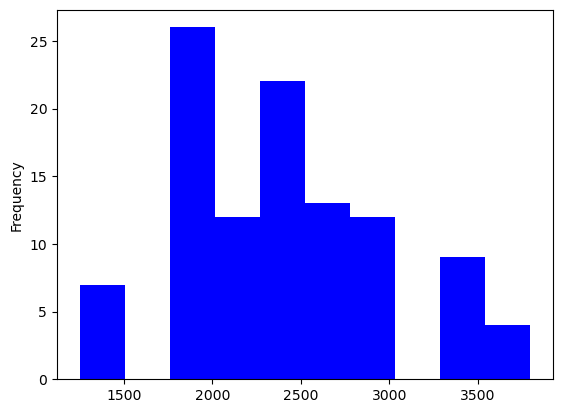

In [37]:
#Comparando los precios de todos los Converse
Converse_hist = scrapper[scrapper.AUTOSERVICIO=="Converse"]["PRECIO"].plot(kind="hist",color="blue")


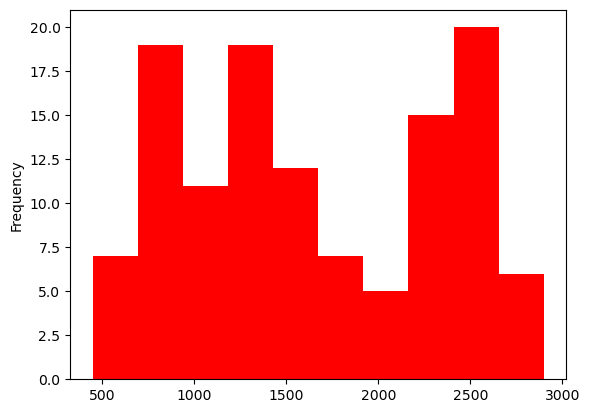

In [38]:
#Comparando los precios de todos los Puma
Puma_hist = scrapper[scrapper.AUTOSERVICIO=="Puma"]["PRECIO"].plot(kind="hist",color="red")


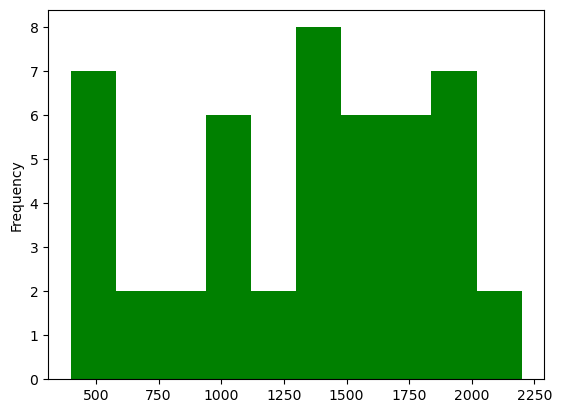

In [39]:
#Comparando los precios de los Reebok
Reebok_hist = scrapper[scrapper.AUTOSERVICIO=="Reebok"]["PRECIO"].plot(kind="hist",color="green")


In [40]:
"""
Converse_hist = scrapper[scrapper.marca=="Converse"]["precios"].plot(kind="hist",color="blue")
Puma_hist = scrapper[scrapper.marca=="Puma"]["precios"].plot(kind="hist",color="red")
Reebok_hist = scrapper[scrapper.marca=="Reebok"]["precios"].plot(kind="hist",color="green")
"""

'\nConverse_hist = scrapper[scrapper.marca=="Converse"]["precios"].plot(kind="hist",color="blue")\nPuma_hist = scrapper[scrapper.marca=="Puma"]["precios"].plot(kind="hist",color="red")\nReebok_hist = scrapper[scrapper.marca=="Reebok"]["precios"].plot(kind="hist",color="green")\n'

<AxesSubplot:ylabel='Frequency'>

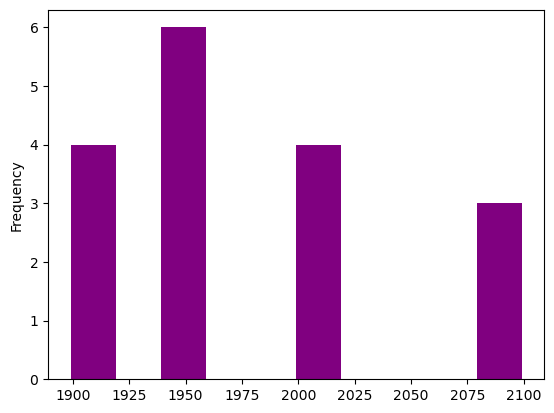

In [41]:
#Comparando los distintos precios que hay en los pares de los modelos 'Ultra'
scrapper[scrapper.MODELO=="Ultra"]["PRECIO"].plot(kind="hist",color="purple")

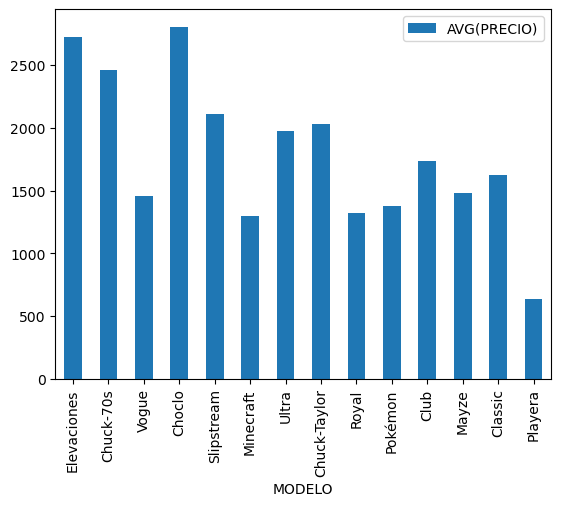

In [42]:
#Para comparar los precios promedios de todos los modelos de todas las marcas
precios_promedios = ps.sqldf("select MODELO,AVG(PRECIO) from scrapper group by MODELO order by PRECIO desc")
precios_promedios.plot.bar(x="MODELO")
modelos = ps.sqldf("select MODELO,AVG(PRECIO) from scrapper group by MODELO order by PRECIO desc")
#modelos


,AUTOSERVICIO,AVG(PRECIO)
0,Converse,2405.190476
1,Puma,1625.859504
2,Reebok,1327.125000


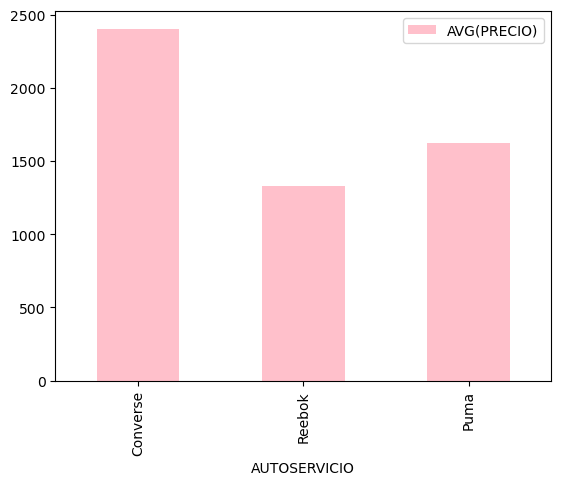

In [46]:
#Comparando los precios promedios de las 3 marcas de zapatos
precios_promedios = ps.sqldf("select AUTOSERVICIO,AVG(PRECIO) from scrapper group by AUTOSERVICIO order by PRECIO desc") 
precios_promedios.plot.bar(x="AUTOSERVICIO",color = "pink")
marcas = ps.sqldf("select AUTOSERVICIO,AVG(PRECIO) from scrapper group by AUTOSERVICIO order by AVG(PRECIO) desc") 
marcas

,AUTOSERVICIO,MIN(PRECIO)
0,Converse,1249.0
1,Puma,449.0
2,Reebok,399.0


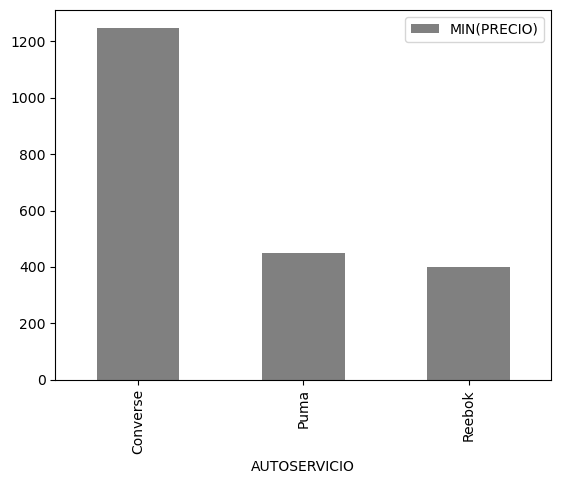

In [44]:
#Comparando los precios más bajos de las 3 marcas de zapatos
precios_min = ps.sqldf("select AUTOSERVICIO,MIN(PRECIO) from scrapper group by AUTOSERVICIO order by PRECIO desc") 
precios_min.plot.bar(x="AUTOSERVICIO",color = "gray")
marca = ps.sqldf("select AUTOSERVICIO,MIN(PRECIO) from scrapper group by AUTOSERVICIO order by PRECIO desc") 
marca